In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
#Read in the Dataset
insurance_df = pd.read_csv('Medical_insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [3]:
#Check for Null Values
insurance_df.loc[pd.isna(insurance_df).any(axis=1)]

,age,sex,bmi,children,smoker,region,charges


In [4]:
# Scale your data
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical

#Convert Categorical Values into Numerical Values
label_encoder_1 = LabelEncoder()
label_encoder_1.fit(insurance_df['sex'])
insurance_df['sex_encoded'] = label_encoder_1.transform(insurance_df['sex'])

label_encoder_2 = LabelEncoder()
label_encoder_2.fit(insurance_df['smoker'])
insurance_df['smoker_encoded'] = label_encoder_2.transform(insurance_df['smoker'])

label_encoder_3 = LabelEncoder()
label_encoder_3.fit(insurance_df['region'])
insurance_df['region_encoded'] = label_encoder_3.transform(insurance_df['region'])

insurance_df

C:\Users\bjros\Anaconda3\Lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


,age,sex,bmi,children,smoker,region,charges,sex_encoded,smoker_encoded,region_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1
...,...,...,...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180,0,0,2
2768,21,female,34.600,0,no,southwest,2020.17700,0,0,3
2769,19,male,26.030,1,yes,northwest,16450.89470,1,1,1
2770,23,male,18.715,0,no,northwest,21595.38229,1,0,1


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(insurance_df[['age', 'sex_encoded', 'bmi', 'children', 'smoker_encoded', 'region_encoded']], insurance_df['charges'], train_size=0.7, test_size=0.3, random_state=42)

In [6]:
X_train

,age,sex_encoded,bmi,children,smoker_encoded,region_encoded
1684,31,1,34.390,3,1,1
862,55,0,33.535,2,0,1
1992,27,0,25.175,0,0,0
889,57,1,33.630,1,0,1
1362,41,1,34.210,1,0,2
...,...,...,...,...,...,...
1638,54,1,34.210,2,1,2
1095,18,0,31.350,4,0,0
1130,39,0,23.870,5,0,2
1294,58,1,25.175,0,0,0


In [7]:
X_test

,age,sex_encoded,bmi,children,smoker_encoded,region_encoded
1106,49,0,29.925,0,0,1
1321,62,1,26.695,0,1,0
2313,57,0,20.100,1,0,3
2274,22,1,39.500,0,0,3
1432,18,0,38.665,2,0,0
...,...,...,...,...,...,...
1900,39,1,28.300,1,1,3
647,40,0,23.370,3,0,0
2438,49,1,29.830,1,0,0
2452,48,1,37.290,2,0,2


In [8]:
y_train

1684    38746.35510
862     12269.68865
1992     3558.62025
889     11945.13270
1362     6289.75490
           ...     
1638    44260.74990
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
Name: charges, Length: 1940, dtype: float64

In [9]:
y_test

1106     8988.15875
1321    28101.33305
2313    12032.32600
2274     1682.59700
1432     3393.35635
           ...     
1900    21082.16000
647      8252.28430
2438     9288.02670
2452     8978.18510
1628    35160.13457
Name: charges, Length: 832, dtype: float64

In [10]:
#Create the Model
from sklearn.neighbors import KNeighborsRegressor

#Create a List of HyperParameter Values
n_neighbors_params = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
weights_params = ['uniform', 'distance']
algorithm_params = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size_params = [10, 20, 30 , 40, 50]
p_params = [1, 2]
metric_params = ['minkowski']


#Create a List for Data
data = []

#Loop through the Values in the HyperParameter List
for i in range(len(n_neighbors_params)):
    for j in range(len(weights_params)):
        for k in range(len(algorithm_params)):
            for l in range(len(leaf_size_params)):
                for m in range(len(p_params)):
                    for n in range(len(metric_params)):
                        n_neighbors_model = KNeighborsRegressor(n_neighbors=n_neighbors_params[i], weights=weights_params[j], algorithm=algorithm_params[k], leaf_size=leaf_size_params[l], p=p_params[m], metric=metric_params[n])

                        #Train the Model
                        n_neighbors_model.fit(X_train, y_train)

                        #Test the Model to Create Predictions
                        y_predict = n_neighbors_model.predict(X_test)

                        #Test the Model Accuracy
                        r2_score = n_neighbors_model.score(X_test, y_test)

                        #Test the Model for Overfitting
                        #Found the Formula at https://stackoverflow.com/questions/51038820/how-to-calculated-the-adjusted-r2-value-using-scikit
                        r2_adj_score = (1 - (1 - r2_score) * (1940 - 1) / (1940 - 6))

                        data.append({'N_Neighbors_Params': n_neighbors_params[i], 'Weights_Params': weights_params[j], 'Algorithm_Params':algorithm_params[k], 'Leaf_Size_Params':leaf_size_params[l], 'P_Params':p_params[m], 'Metric_Params':metric_params[n], 'R^2_Score': r2_score, 'R^2_Adj_Score': r2_adj_score})

#Create Empty DataFrame to Store Parameter Values and Resultant R^2 & R^2 Adjusted Scores
tuning_df = pd.DataFrame(data=data, columns=['N_Neighbors_Params', 'Weights_Params', 'Algorithm_Params', 'Leaf_Size_Params', 'P_Params', 'Metric_Params', 'R^2_Score', 'R^2_Adj_Score'])
#Create a Column to Store the Difference Between R^2 & R^2 Adjusted Values
tuning_df['R^2_Minus_R^2_Adjusted'] = tuning_df['R^2_Score'] - tuning_df['R^2_Adj_Score']

#Show When Done
print(f"Hyper Parameter Evaluation Done.")

Hyper Parameter Evaluation Done.


In [11]:
tuning_df

,N_Neighbors_Params,Weights_Params,Algorithm_Params,Leaf_Size_Params,P_Params,Metric_Params,R^2_Score,R^2_Adj_Score,R^2_Minus_R^2_Adjusted
0,1,uniform,auto,10,1,minkowski,0.747205,0.746552,0.000654
1,1,uniform,auto,10,2,minkowski,0.698298,0.697518,0.000780
2,1,uniform,auto,20,1,minkowski,0.747205,0.746552,0.000654
3,1,uniform,auto,20,2,minkowski,0.698302,0.697522,0.000780
4,1,uniform,auto,30,1,minkowski,0.747205,0.746552,0.000654
...,...,...,...,...,...,...,...,...,...
795,10,distance,brute,30,2,minkowski,0.803597,0.803089,0.000508
796,10,distance,brute,40,1,minkowski,0.828973,0.828531,0.000442
797,10,distance,brute,40,2,minkowski,0.803597,0.803089,0.000508
798,10,distance,brute,50,1,minkowski,0.828973,0.828531,0.000442


In [12]:
#Find the Highest r^2 Value
max_ = tuning_df.loc[tuning_df['R^2_Minus_R^2_Adjusted'] <= 0.10]['R^2_Score'].max()
#Print the Rows Containing the Highest r^2 Value
max_rows = tuning_df.loc[tuning_df['R^2_Score']==max_].reset_index(drop=True)
max_rows

,N_Neighbors_Params,Weights_Params,Algorithm_Params,Leaf_Size_Params,P_Params,Metric_Params,R^2_Score,R^2_Adj_Score,R^2_Minus_R^2_Adjusted
0,4,distance,brute,10,1,minkowski,0.846657,0.84626,0.000396
1,4,distance,brute,20,1,minkowski,0.846657,0.84626,0.000396
2,4,distance,brute,30,1,minkowski,0.846657,0.84626,0.000396
3,4,distance,brute,40,1,minkowski,0.846657,0.84626,0.000396
4,4,distance,brute,50,1,minkowski,0.846657,0.84626,0.000396


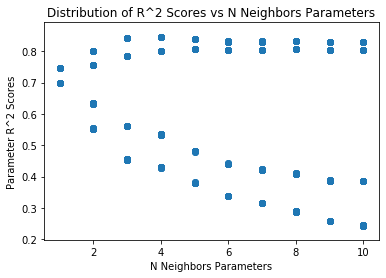

In [13]:
#Create Plot of Match-up Score r^2 Values for the DLC Characters vs Alpha Init Values

#Show a Wide View of All Data Points
plt.scatter(tuning_df['N_Neighbors_Params'], tuning_df['R^2_Score'])
plt.xlabel('N Neighbors Parameters')
plt.ylabel('Parameter R^2 Scores')
plt.title('Distribution of R^2 Scores vs N Neighbors Parameters')
plt.show()

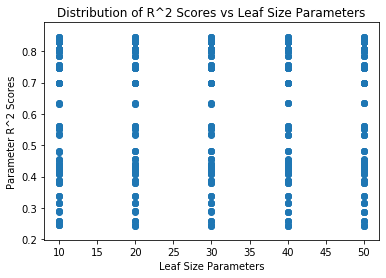

In [14]:
#Show a Wide View of All Data Points
plt.scatter(tuning_df['Leaf_Size_Params'], tuning_df['R^2_Score'])
plt.xlabel('Leaf Size Parameters')
plt.ylabel('Parameter R^2 Scores')
plt.title('Distribution of R^2 Scores vs Leaf Size Parameters')
plt.show()

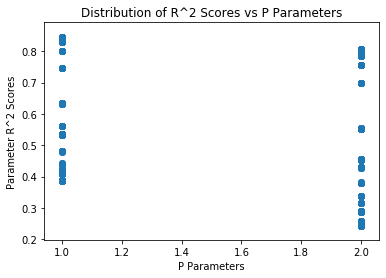

In [15]:
#Show a Wide View of All Data Points
plt.scatter(tuning_df['P_Params'], tuning_df['R^2_Score'])
plt.xlabel('P Parameters')
plt.ylabel('Parameter R^2 Scores')
plt.title('Distribution of R^2 Scores vs P Parameters')
plt.show()

In [16]:
#Re-import the Bayesian Ridge Model & Implement Parameter Values Associated with the Maximum R^2 Value, where the Difference
#Between the R^2 ^ R^2 Adjusted Values was <0.10
from sklearn.neighbors import KNeighborsRegressor

n_neighbors_model = KNeighborsRegressor(n_neighbors=max_rows['N_Neighbors_Params'][0], weights=max_rows['Weights_Params'][0], algorithm=max_rows['Algorithm_Params'][0], leaf_size=max_rows['Leaf_Size_Params'][0], p=max_rows['P_Params'][0], metric=max_rows['Metric_Params'][0])

#Train the Model
n_neighbors_model.fit(X_train, y_train)

#Test the Model to Create Predictions
y_predict = n_neighbors_model.predict(X_test)

#Test the Model Accuracy
r2_score = n_neighbors_model.score(X_test, y_test)

#Test the Model for Overfitting
#Found the Formula at https://stackoverflow.com/questions/51038820/how-to-calculated-the-adjusted-r2-value-using-scikit
r2_adj_score = (1 - (1 - r2_score) * (1940 - 1) / (1940 - 6))

In [17]:
#Create a Test/Prediction DataFrame
prediction_df = pd.DataFrame({'Age': X_test['age'], 'Sex':X_test['sex_encoded'], 'BMI':X_test['bmi'], 'Children':X_test['children'], 'Smoker':X_test['smoker_encoded'], 'Region':X_test['region_encoded'], 'Actual_Charges': y_test, 'Predicted_Charges': y_predict})
prediction_df = prediction_df.reset_index(drop=True)
prediction_df['Index'] = prediction_df.index
prediction_df

,Age,Sex,BMI,Children,Smoker,Region,Actual_Charges,Predicted_Charges,Index
0,49,0,29.925,0,0,1,8988.15875,8988.158750,0
1,62,1,26.695,0,1,0,28101.33305,28101.333050,1
2,57,0,20.100,1,0,3,12032.32600,12032.326000,2
3,22,1,39.500,0,0,3,1682.59700,1682.597000,3
4,18,0,38.665,2,0,0,3393.35635,3393.356350,4
...,...,...,...,...,...,...,...,...,...
827,39,1,28.300,1,1,3,21082.16000,21082.160000,827
828,40,0,23.370,3,0,0,8252.28430,7986.203965,828
829,49,1,29.830,1,0,0,9288.02670,9288.026700,829
830,48,1,37.290,2,0,2,8978.18510,8978.185100,830


In [18]:
from sklearn import feature_selection
from sklearn.preprocessing import FunctionTransformer as transformer

In [20]:
#Print the Correlation Coefficients
#print(f"The coefficients are: {n_neighbors_model.coef_}")
print(f"The list of features and their corresponding coefficients are: {list(zip(X_test.columns))}")
n_neighbors_coef_df = pd.DataFrame({'Features':X_test.columns})
n_neighbors_coef_df

The list of features and their corresponding coefficients are: [('age',), ('sex_encoded',), ('bmi',), ('children',), ('smoker_encoded',), ('region_encoded',)]


,Features
0,age
1,sex_encoded
2,bmi
3,children
4,smoker_encoded
5,region_encoded


In [22]:
#Check the Descriptive Statistics to See What Features Make the Best Predictors
import scipy.stats as stats

#ANOVA_results = stats.kruskal(test_linear_df_X1.dropna(axis=0), test_linear_df_Y1['Life expectancy '].dropna(axis=0))
ANOVA_results = feature_selection.f_regression(X_test.dropna(axis=0), y_test.dropna(axis=0))
#print(f"The selected features are: {selected_features.columns.values}")
#print(f"The F-values are: {ANOVA_results[0]}")
#print(f"The p-values are: {ANOVA_results[1]}")
F_regression_df = pd.DataFrame({'Selected_Features': X_train.columns.values, 'F-values': ANOVA_results[0], 'p-values': ANOVA_results[1]})
#F_regression_df = pd.DataFrame({'Selected_Features': transformer(feature_names_out = 'one-to-one').get_features_names_out(), 'F-values': ANOVA_results[0], 'p-values': ANOVA_results[1]})
#F_regression_df.sort_values('F-values', ascending=False)
F_regression_df1 = pd.merge(F_regression_df, n_neighbors_coef_df, how = 'left', left_on = 'Selected_Features', right_on = 'Features')
F_regression_df2 = F_regression_df1.drop(columns='Features', axis = 1)
F_regression_df3 = F_regression_df2.dropna(subset=['F-values', 'p-values'])
F_regression_df4 = F_regression_df3.loc[F_regression_df3['p-values'] <= 0.05]
F_regression_df4#.sort_values('Coefficients', ascending=False)

,Selected_Features,F-values,p-values
0,age,92.055264,9.578824e-21
1,sex_encoded,4.242364,3.973857e-02
2,bmi,44.622718,4.375005e-11
4,smoker_encoded,1339.840843,2.220614e-175


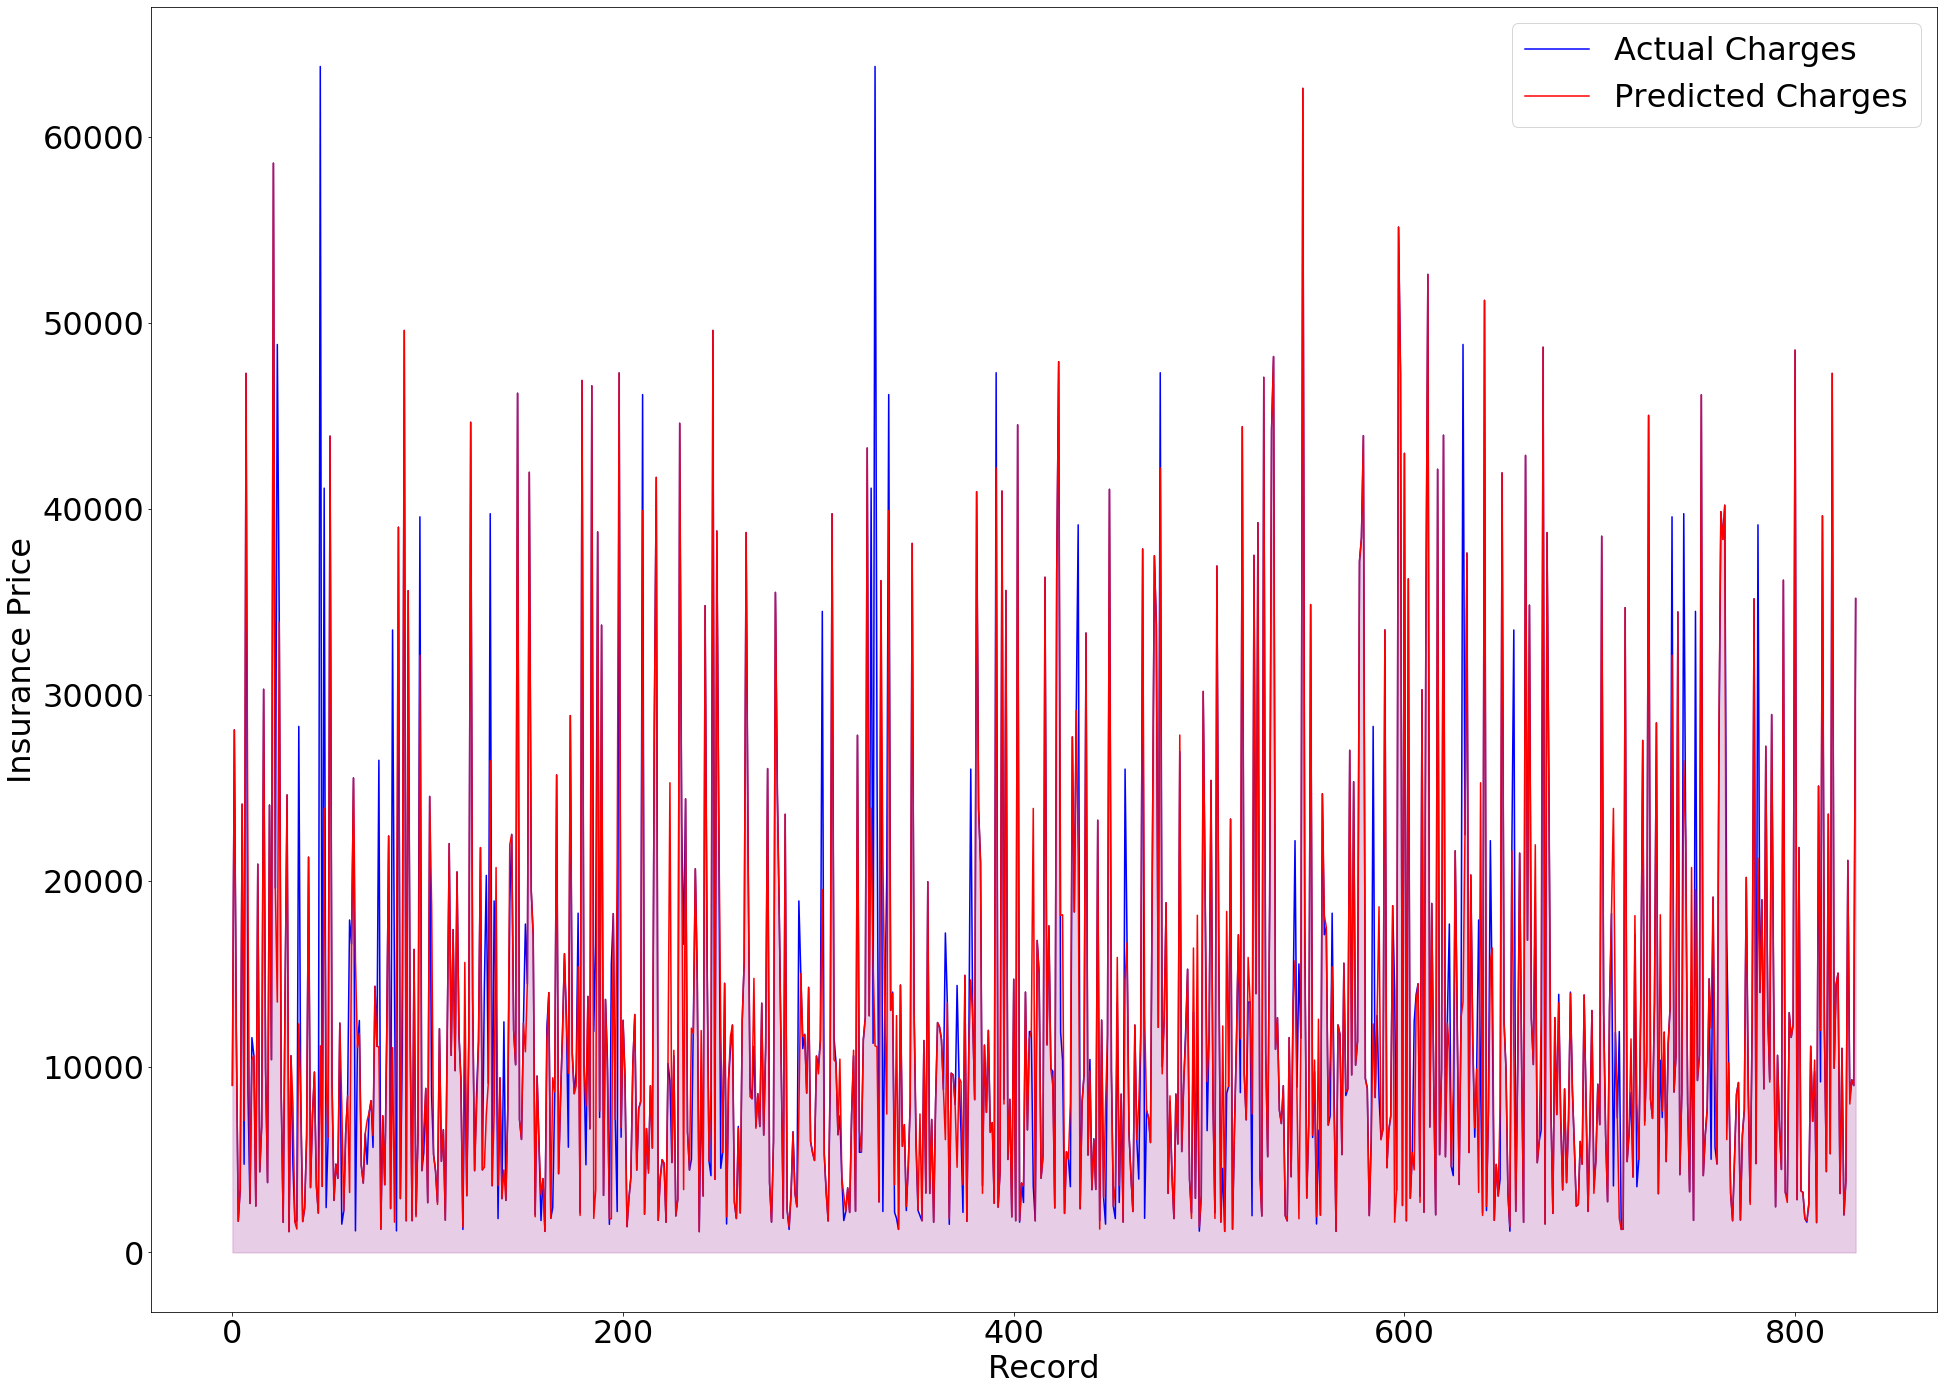

In [24]:
#Graph the Differences Between Actual & Predicted Charges

fig, ax = plt.subplots()
ax.plot(prediction_df['Index'], prediction_df['Actual_Charges'], color='blue', alpha=1.00, label='Actual Charges')
ax.fill_between(prediction_df['Index'], prediction_df['Actual_Charges'], 0, color='blue', alpha=.1)

ax.plot(prediction_df['Index'], prediction_df['Predicted_Charges'], color='red', alpha=1.00, label='Predicted Charges')
ax.fill_between(prediction_df['Index'], prediction_df['Predicted_Charges'], 0, color='red', alpha=.1)
ax.legend()

plt.xlabel('Record')
plt.ylabel('Insurance Price')
plt.rcParams.update({'font.size': 32})
plt.gcf().set_size_inches(32, 24)

plt.show()